# INFO 204 Practical Test 2 Practice Test

This notebook provides some expectation towards the types of questions that you may encounter in the practical test - it is not an exact copy of the style of questions that you will be asked in the practical test, but should provide an overview of where you should focus your revision.

The practice test has three sections:
1. Fitting, interpreting, and optimising k-means clustering
2. Supervised learning on text
3. Short answer questions

Rather than repeat the text here, some sections in this document will ask you to revisit exercises in previous labs. <span style='color: #ce2227'>___YOU ARE STRONGLY ADVISED TO COMPLETE LABS 8 AND 10 AS REVISION FOR THIS TEST___</span>

In the test, we will load all the libraries for you, much like we do here:

In [5]:
%env OMP_NUM_THREADS=1
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

from pandas.plotting import parallel_coordinates

from sklearn.metrics import silhouette_score, confusion_matrix, classification_report, f1_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_wine

env: OMP_NUM_THREADS=1


In the test, YOU WILL NOT NEED TO (NOR SHOULD YOU) LOAD ADDITIONAL LIBRARIES

## Part 1: Clustering

The following questions work with the following data:

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,-2.336348,2.366517,-19.494944,99.741573,2.295112,2.029270,-0.361854,1.590899,-5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,-5.800000,1.360000,-30.000000,70.000000,0.980000,0.340000,-0.660000,0.410000,-13.000000,0.480000,1.270000,278.000000
25%,12.362500,-3.082500,2.210000,-21.500000,88.000000,1.742500,1.205000,-0.437500,1.250000,-6.200000,0.782500,1.937500,500.500000
50%,13.050000,-1.865000,2.360000,-19.500000,98.000000,2.355000,2.135000,-0.340000,1.555000,-4.690000,0.965000,2.780000,673.500000
75%,13.677500,-1.602500,2.557500,-17.200000,107.000000,2.800000,2.875000,-0.270000,1.950000,-3.220000,1.120000,3.170000,985.000000
max,14.830000,-0.740000,3.230000,-10.600000,162.000000,3.880000,5.080000,-0.130000,3.580000,-1.280000,1.710000,4.000000,1680.000000


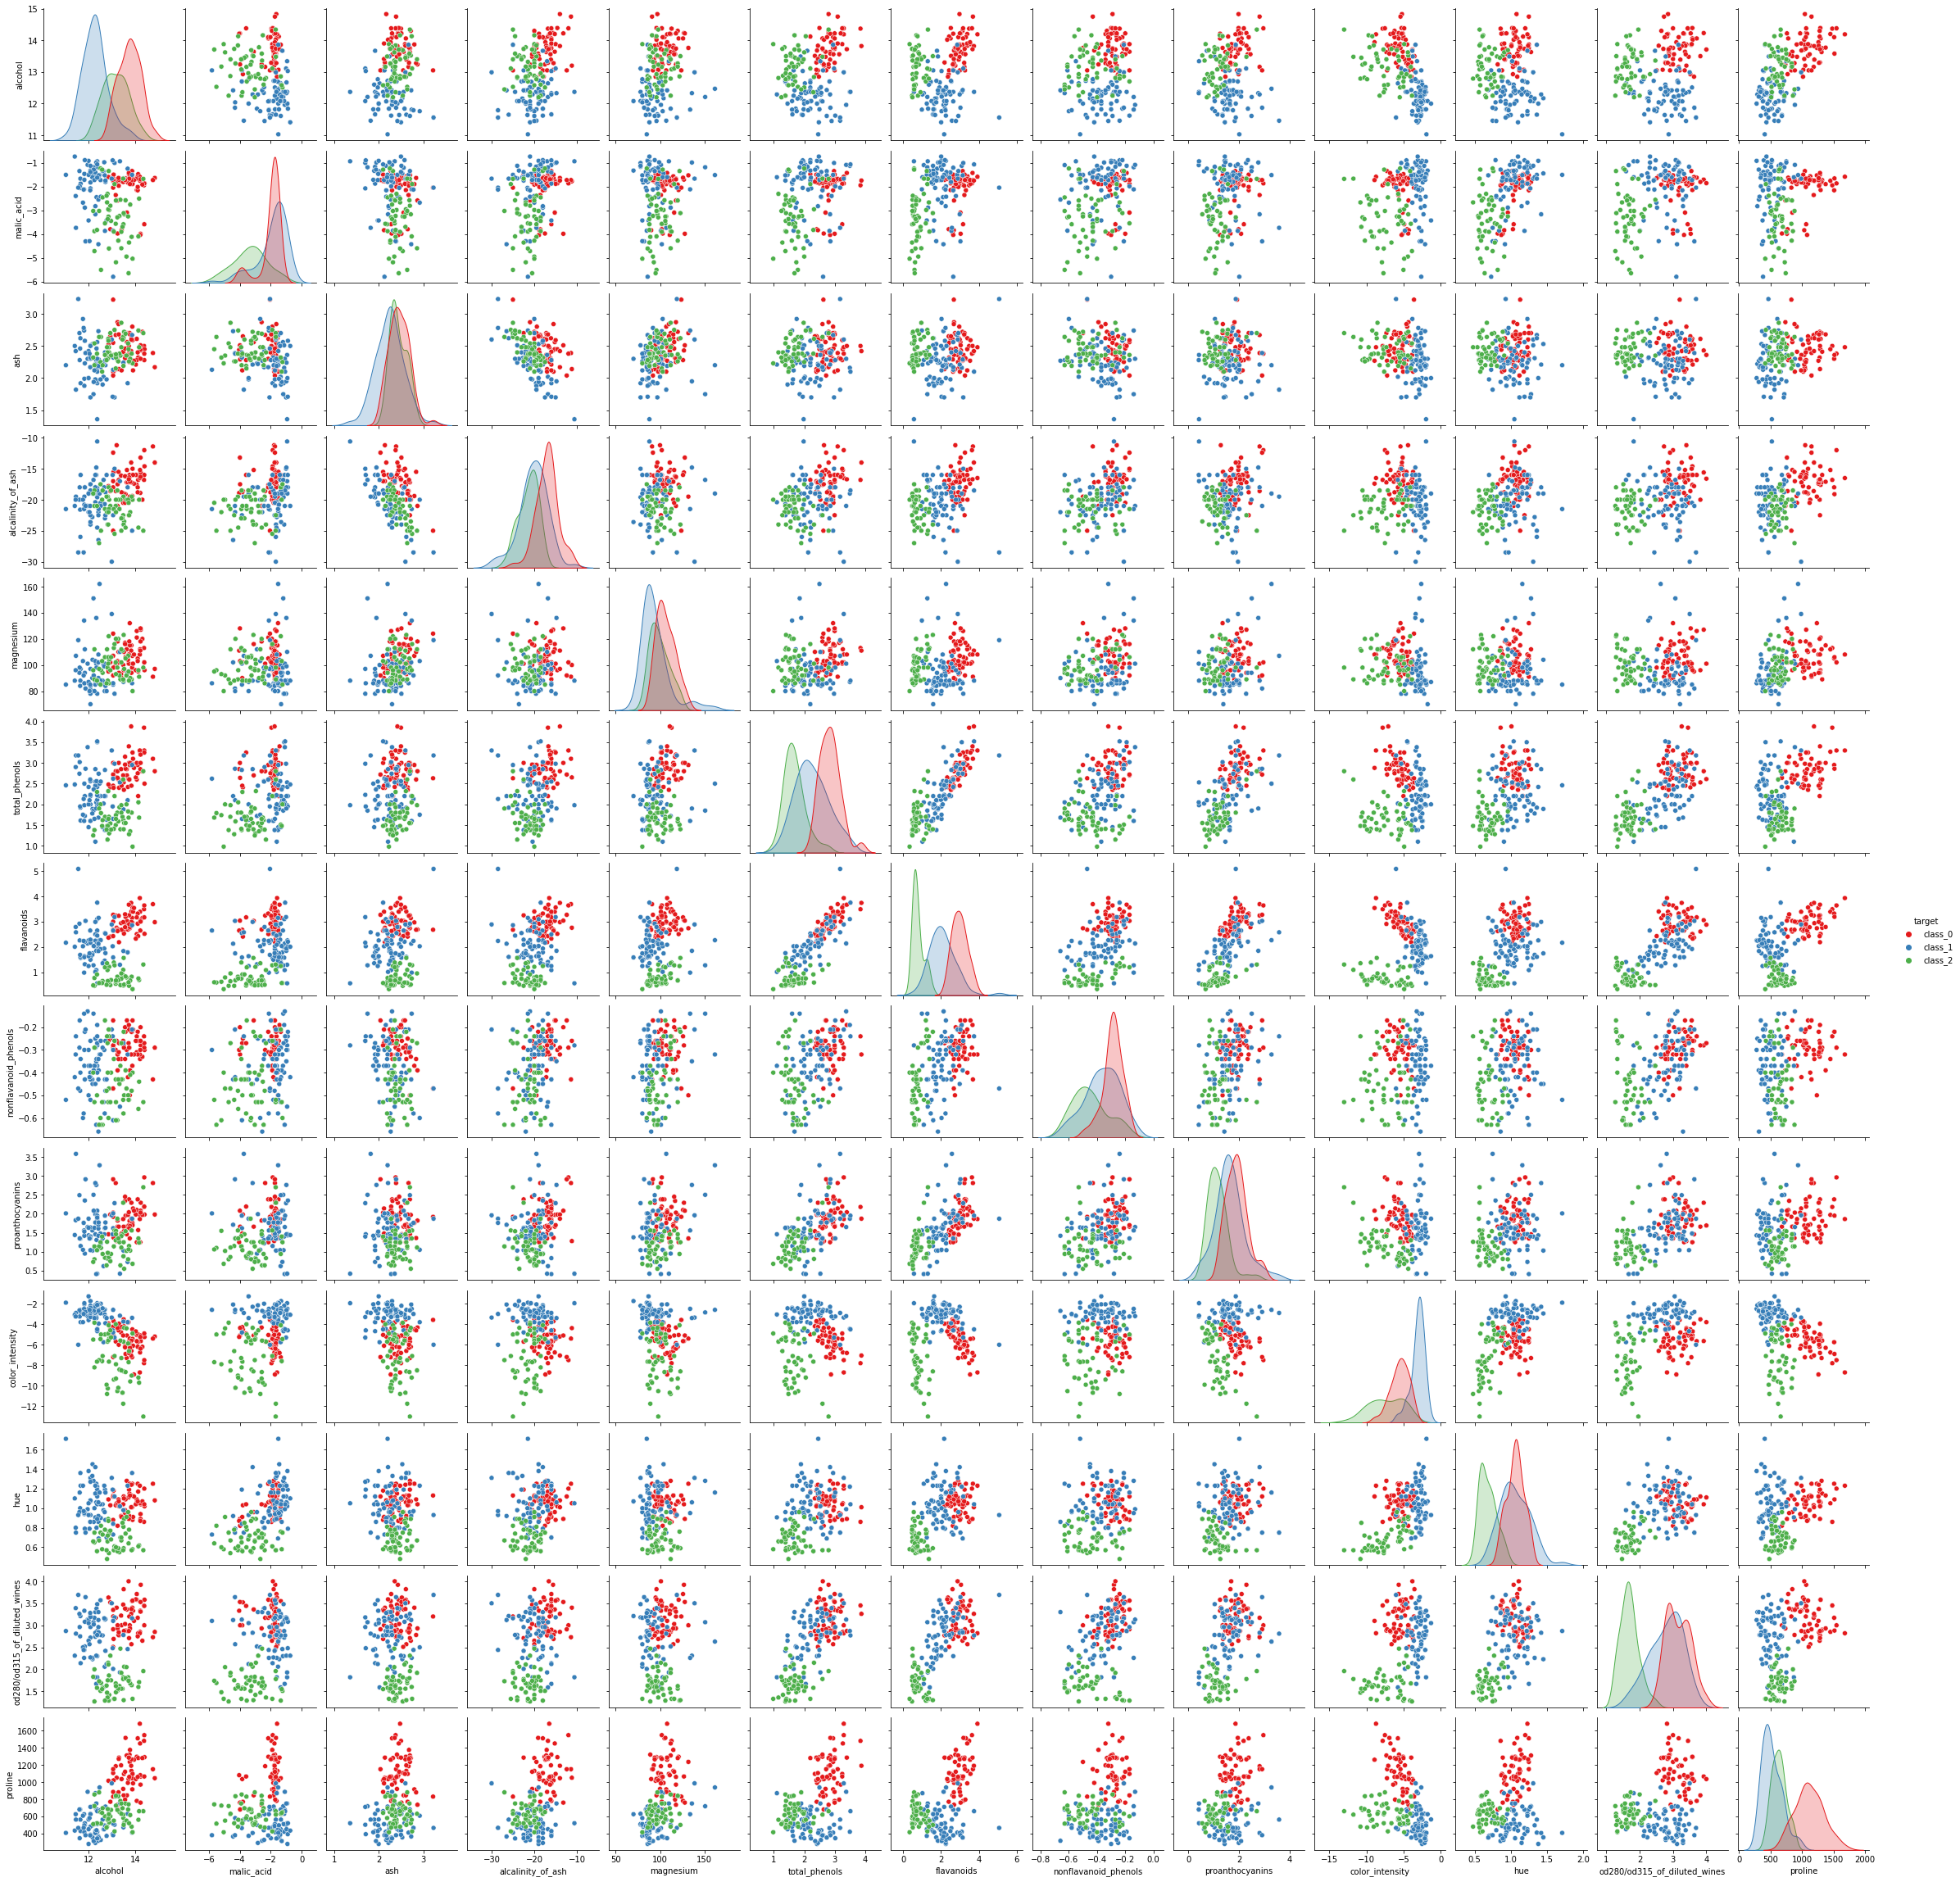

In [6]:
wine = load_wine()
X, t = wine['data'], wine['target']
for c in [  1, 3, 7, 9 ]:
    X[:, c] = -X[:, c]

feature_names = wine['feature_names']

all_data = pd.DataFrame(X, columns=feature_names)
all_data['target'] = wine['target_names'][t]

display(all_data.describe())

sns.pairplot(all_data, hue='target', palette='Set1')
plt.show()

### <span style='color: #ce2227'>TASK 1:</span> Perform a silhouette analysis of k-means clustering on this data set. Consider between 2 and 10 clusters. Produce a plot that compares the number of clusters on the x axis against the silhouette score in the y axis. As part of your analysis, return a variable called `best_clusters` that identifies the number of clusters that produces the best silhouette score. MAKE SURE TO STANDARDISE VARIABLES IF YOU THINK IT'S IMPORTANT.

   cluster size        ss
0             2  0.259317
1             3  0.284859
2             4  0.265897
3             5  0.231846
4             6  0.198191
5             7  0.192697
6             8  0.148468
7             9  0.161047
8            10  0.153552
3


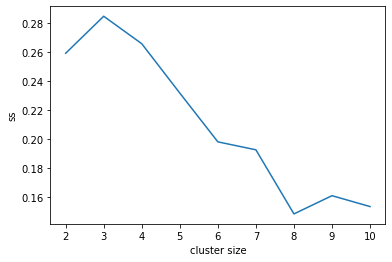

In [7]:
### WRITE YOUR CODE HERE
scaler = StandardScaler()
Z = scaler.fit_transform(X)

N_clusters = [2,3,4,5,6,7,8,9,10]
plt.show()
km = KMeans(6, random_state=1234).fit(Z)
C = km.labels_
ssararay = []

highest = 0.0
best_clusters = 0

for x in N_clusters:
    km = KMeans(x, random_state=1234).fit(Z)
    C = km.labels_
    s = silhouette_score(Z, C)
    ssararay.append(s)
    if (s > highest):
        highest = s
        best_clusters = x

df = pd.DataFrame({"cluster size": N_clusters,"ss": ssararay})
sns.lineplot(data =df, x = "cluster size", y = "ss")
print(df)
print(best_clusters)

### <span style='color: #ce2227'>TASK 2:</span> Using the `best_clusters` identified in the previous task, perform k-means clustering on this data set and extract the cluster centroid into a data frame. Add a `cluster` column to the data frame that indicates a unique identifer for each row (i.e., each cluster centroid). Use this data frame to produce a parallel coordinates plot of these centroids, coloured by the cluster label. Then briefly describe the the nature of the cluster centers (e.g., features that tend to produce good cluster separation)

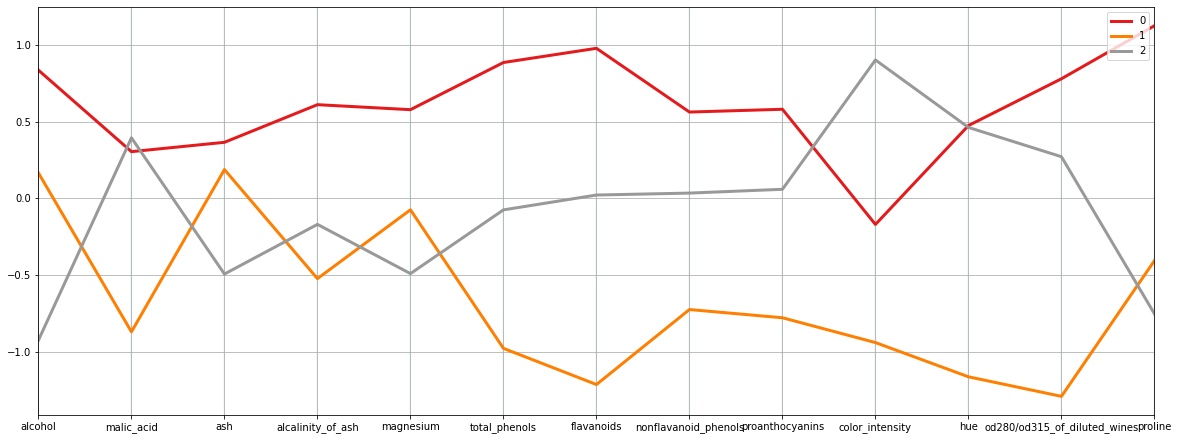

In [8]:
### WRITE YOUR CODE HERE\
scaler = StandardScaler()
Z = scaler.fit_transform(X)
num_clusters = best_clusters

km = KMeans(num_clusters, random_state=1234).fit(Z)
C1 = km.cluster_centers_

centroidData = pd.DataFrame(C1, columns = feature_names)
centroidData['cluster'] = range(best_clusters)

fig = plt.figure(figsize = (20, 7.5))
parallel_coordinates(centroidData, class_column='cluster', colormap='Set1', linewidth=3, axvlines_kwds={ 'linewidth' : 0.1 })
plt.show()


___WRITE YOUR ANSWER HERE___

## Part 2: Supervised Learning with Text

Here, you will revisit the SPAM classification problem from Lab 10. Load the data in and split the data into 70% training and 30% testing.


In [9]:
### WRITE YOUR CODE HERE (IN THE TEST THIS WILL BE PROVIDED)
spam_url = 'https://dl.dropboxusercontent.com/s/nhnfsqyj6a8egx6/spam.csv.gz?dl=0'
spam_df = pd.read_csv(spam_url, index_col=0, compression='gzip')
text = spam_df['text'].astype('U')
lab  = spam_df['class'].to_numpy()

text_train, text_test, lab_train, lab_test = train_test_split(text, lab, train_size=1000, stratify=lab, random_state=1234,)

In [10]:
def extract_cv_results(cv, tfidf_name='tfidf', dimred_name='dimred'):
    results = pd.DataFrame(cv.cv_results_)

    tfidf_columns = results.columns[results.columns.str.match(f'param_{tfidf_name}')]
    dimred_columns = results.columns[results.columns.str.match(f'param_{dimred_name}__n_components')]
    id_vars = np.concatenate([ tfidf_columns, dimred_columns ])

    score_columns = results.columns[results.columns.str.match('split.+_test_score')]

    results = results.melt(id_vars=id_vars, value_vars=score_columns, value_name='score')
    results.columns = results.columns.str.removeprefix('param_')
    results.columns = results.columns.str.removeprefix(f'{dimred_name}__')

    return results

### <span style='color: #ce2227'>TASK 3:</span> Construct a Pipeline that contains two steps - a step called `'bow'` that uses a `CountVectorizer` to convert text into a bag of words representation, and a second step that uses a `LogisticRegression` to perform classification. Using `cross_val_score`, along with the required resources (e.g., `KFold` to determine the number of cross valiation folds, and a suitable scorer that takes into account the underlying class distribution), determine the mean cross validation performance performance of this pipline on the training data:

In [11]:
### WRITE YOUR CODE HERE
lm = Pipeline([
    ('bow', CountVectorizer()),
    ('lm', LogisticRegression())
])

kf = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1234)
scorer = make_scorer(f1_score, average='macro')
score = cross_val_score(lm, text_train,lab_train, cv=kf, scoring=scorer)

c:\Users\leon1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\leon1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [12]:
print(np.mean(score))

0.9505800121512367


### <span style='color: #ce2227'>TASK 4:</span> Extend the pipeline from the previous task such that it includes a step for feature extracttion via TF-IDF, and then a dimension reduction using a `TruncatedSVD`. Name these new steps `'tfidf'` and `'dimred'`. This pipeline will need tuning, so create a tuning grid that examines: whether or not to use a `TfIdfTransformer` in the `'tfidf'` step; and the number of components `n_components` within a `TruncatedSVD` operation sitting within the `dimred` step (explore the number of components [1, 3, 7, 15, 31, 62, 125, 250, 500]). Finally, use `GridSearchCV` object to tune and fit a model against our training data.

In [13]:
### WRITE YOUR CODE HERE
SVD=[1,3,7,15,31,62,125, 250, 500]
lm = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', None),
    ('dimred', None),
    ('lm', LogisticRegression())
])
param_grid = {
    'tfidf' : [ 'passthrough', TfidfTransformer()],
     'dimred': [TruncatedSVD()],
     'dimred__n_components': SVD

}
cv = GridSearchCV(lm, param_grid=param_grid, scoring=scorer, cv=kf, n_jobs=-1).fit(text_train, lab_train)
print(cv.best_score_, cv.best_params_)

cv_results = pd.DataFrame(cv.cv_results_)
display(cv_results)

SyntaxError: invalid syntax (2351145098.py, line 7)

In [1]:
cv2 = cv_results.melt(id_vars=['param_tfidf', 'param_dimred__n_components'], value_vars=[ f'split{i}_test_score' for i in range(kf.n_repeats) ])
sns.lineplot(data = cv2, x = 'param_dimred__n_components', y = 'value', hue = 'param_tfidf')
print(cv2)

NameError: name 'cv_results' is not defined

### <span style='color: #ce2227'>TASK 5:</span> Use the provided `extract_cv_results` function to produce a data frame from the cross validation results in the previous step. Use this data frame to produce a line plot that plots the number of components used in the x axis against mean cross validation score in the y axis. Colour this plot according to whether or not TF-IDF was used or not. Finally, add a horizontal line to this plot that shows the performance of the pipeline from Task 3

                  tfidf n_components            variable     score
0           passthrough            1   split0_test_score  0.367089
1    TfidfTransformer()            1   split0_test_score  0.827918
2           passthrough            3   split0_test_score  0.429563
3    TfidfTransformer()            3   split0_test_score  0.879227
4           passthrough            7   split0_test_score  0.879808
..                  ...          ...                 ...       ...
535  TfidfTransformer()          125  split29_test_score  0.919711
536         passthrough          250  split29_test_score  0.979798
537  TfidfTransformer()          250  split29_test_score  0.929655
538         passthrough          500  split29_test_score  0.979798
539  TfidfTransformer()          500  split29_test_score  0.919711

[540 rows x 4 columns]


<AxesSubplot:xlabel='n_components', ylabel='score'>

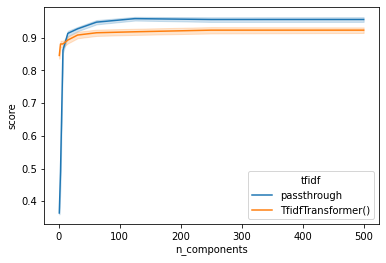

In [ ]:
cv3 = extract_cv_results(cv)

print(cv3)

sns.lineplot(data = cv3, x = 'n_components', y = 'score', hue = 'tfidf')

### <span style='color: #ce2227'>TASK 6:</span> Extract the best estimator pipeline identified by cross validation in Task 4. From this pipeline, extract the `CountVectorizer` used at the `'bow'` step, and the `TruncatedSVD` object used at the `'dimred'` step. Use the `explained_variance_ratio_` array of the pipeline's `TruncatedSVD` object to explain the amount of feature variance captured by this model, and print the length of the vocabulary of the pipeline's `CountVectorizer` object. Finally, obtain the test predictions of the best estimator, and use these predictions within a `classification_report` and `confusion_matrix` call.

In [ ]:
### WRITE YOUR CODE HERE
model = cv.best_estimator_
bow = model["bow"]
dimred = model["dimred"]

print(cv.best_score_, cv.best_params_)
print(len(bow.vocabulary_))
print(np.sum(dimred.explained_variance_ratio_))
pred = model.predict(text_test)
cr = classification_report(lab_test, pred, zero_division= 0 )
cm= confusion_matrix(lab_test, pred)
print(cm)
print(cr)

0.9584274555473612 {'dimred': TruncatedSVD(n_components=125), 'dimred__n_components': 125, 'tfidf': 'passthrough'}
44850
0.9996515210123815
[[27984  1800]
 [  646 21506]]
              precision    recall  f1-score   support

           +       0.98      0.94      0.96     29784
           -       0.92      0.97      0.95     22152

    accuracy                           0.95     51936
   macro avg       0.95      0.96      0.95     51936
weighted avg       0.95      0.95      0.95     51936



### <span style='color: #ce2227'>TASK 7:</span> Comment on the performance variation between using TF-IDF and not, along with the number of components used by the pipeline in Tasks 4-6, relative to the performance of the pipeline used in Task 3.

As you can see the mean score went up 0.004% when introduced the  param grid/cross validation and that the highest f1_score would be the passthrough method with componensts 125 as it peaks higher than the tfdif transformer. At the end it shows the best model abd how much variance is explained.

## Part 3: Short Answer Questions:

Topics that may be explored in this section will come from Lectures 15-17, 19, and 21-22, such as:
1. TF-IDF, how it works, and its main goal (Lecture 21)
TF-IDF's goal is to weigh individual terms in analysis to reflect theyr novelty and overall importance to the document. What it does is it suppresses the relevance of commoon words and improves the performance along with lowering the amount of principle components. In onrmal patterns of tex, TF-IDF can serve to effectively elimate the adverse properties of stopwords without needing to specify the stop wrods in advance. Amplifys the effect of important / "rare" words that appear in only a few documents.

2. The purpose of word embeddings against a bag of words-like representation (Lecture 22)
Bag of words = one feature to decribe a word, with the only information being how many times said word appear in dovument.
word embedding "distributes" the properties of a word over many features with respect to the word (you can think of the feature being a categoryand the value assigned to a given word being the degree of it belonging to that category)
word embeddings allow the intent and semantics of a word to be established and the vectore represents allows two words to be compared for similarity


3. Bias and variance in supervised learning, and their relationship to bagging and boosting (Lecture 19)
Bias is the flexibility of the data which vairance is the sesnsetivity of the data. They are inversly related so that when there is a lot of variance there will be lower bias vice versa.  There are different ensamble learning strategies and these come in the form of bagging and boosting. Bagging is when reduce the variance componet of a low bias (high variance learner). The requirement would be a unstable learner something with a high variance as rhis means that the data is sensetive to changes in training sample and each base learner in ensamble trained on a bootstrap sample of the original data (sampling with replacement). Boostring on the other hand does the opposite, it reduces the bias component of a low variance learner(high bias), Where ensamble learners exhbit specialisation onn the same data. Each base learner learns on the mistake of the previouse leaners, thre result being the sum of the set of model predictions.

total prediction error can be though of as a combination of bias (ability to fit underlying signal) and variance (response tp noise in samplying and during learning). A single model must trade rort and variance to obtain the lower overall error that it can produce if one does not attemp to blanace bias and variance, then we are left with and underfitting (high bias, low variance) or overfitted (low bas and high variance)
 mode

 bagging and boosting are examples of ensemble learning where we attempt to overcome the limitation of a given modelling apporiach hrough aggreagtin multiple models into a single predictor

 in bagging we built several models from low bias learner, each learned froma  boostrap sample of the originae models to lower erage the prediction of these models to lower the overall variance

 in boostring we build several models froma  high bias (,low variance ), each model built on a residuals of the previouse model effectively each subsequent models. We then sum the prediciton from these model for out final prediction this has the effect of lowering bias

 Both bagging and boostring rely heavily on the fact that each model built on a bootstrap sample and/or residuals will be distinct from the other models that are built. This model diversity is a key requirement for ensamble learning to work properly.

4. When should (or shouldn't) standardisation be used in unsupervised learning, such as k-means clustering or PCA
Stanradrdisation is important when the unis of features differ and their scales (range of valueus with the features) differ widely this is to ensure that all features are considered/compared under a common (dimenstionless) unit.
however, if all feature are captured in the same units (e.g, kWh, kg, ms-1), then the difference in scale are meaning ful and so standarisation may not be useful.

5. What are principal components? Why might it be possible to reduce the number of dimensions of a problem using PCA and not reduce classification or regression performance?
principle components are the amount of directions of variation in the data. We can reduce the number of regression of a problem using pca. As we only tend to see around 80% of the data but regression and classification uses 100% of the data so reducing the amount of dimensionsn using PCA wot affect regression performance.

the way that we capture data is dependent upon the orientation of the observed features used (e.g, camerase and sensirs)

sometimes, the orientation of our features mean that the data captured about a single real feature(the principle component ) is in fact spread over multiple observers

PCA allows us to potentially reconstruct that single feature and so turn the problem from being modelling multiple features into a simple one

PCA may also allow us to "denoise" features by pushing these noise elements into later components  - we can trim off the lesser copmonents and ust focus on the first principle component.




6. What is the relationship between PCA as used in the eigenfaces problem, and the layers of a convolutional neural network? (thinking back to Lecture 13 and Lab 7 for this may help)
More layers the better and more pca in terms of eigenfaces is better. As the PCA in this context represents the amount of pixels it gets turned back into and with more pca then more layers and clearer the picture.

Don't forget to check the tutorials related to these lectures for information that may help with answering these questions.PCA servers to construct features from the original inputs(the principle components can each be though of as some linear composition of the original feature), so we use these as  the inputs of a (for example ) linear model.

The convolution layers in a CNN serve the same purpose (albiet in a different fashion). The early layers in  a CNN use convolutions to extract new features from the original inputs and these new geatures are what is ultimately used as the input to the linear model.



other tips to follow why is commincation/insight generaltiono difficult with an ensamble?

how to obtain the total explained variance ratio of the principle components in PCA